In [57]:
import pandas as pd
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree 
import matplotlib.pyplot as plt
import graphviz
#import numpy as np

In [58]:
rawDf = pd.read_csv("data/tier6ind2.csv")
df = rawDf.copy()
df = df.dropna(subset=["divsRank"])
df.head()

,divsRank,swimmerage,event,qualified,points,divsSpeed,numRelays,numEvents,seedSpeed,numSwimmers,...,divsTimePctOfMean,divsSpeedDiffFromMean,normed_divsTimePctOfMean,normed_divsSpeedDiffFromMean,normed_divsSpeed,normed_numSwimmers,normed_numQualified,normed_swimmerage,clipped_divsRank,normed_numRelays
0,1.0,15,1,True,20,1.446759,2,2,1.331115,15,...,0.728062,0.349520,-1.417602,1.671540,1.153046,-0.804906,-1.068498,-0.901005,0.041667,1.0
1,2.0,15,1,True,16,1.435441,1,2,1.392564,15,...,0.733803,0.338202,-1.387676,1.617412,1.108569,-0.804906,-1.068498,-0.901005,0.083333,0.5
2,3.0,17,1,True,18,1.430206,2,2,1.517451,15,...,0.736489,0.332967,-1.373674,1.592376,1.087997,-0.804906,-1.068498,1.325008,0.125000,1.0
3,4.0,17,1,True,14,1.322227,2,2,1.198753,15,...,0.796634,0.224988,-1.060140,1.075978,0.663670,-0.804906,-1.068498,1.325008,0.166667,1.0
4,5.0,17,1,True,12,1.208532,1,2,1.176886,15,...,0.871578,0.111293,-0.669457,0.532248,0.216885,-0.804906,-1.068498,1.325008,0.208333,0.5


In [59]:
x = df[["qualified", "stroke", "normed_divsSpeedDiffFromMean", "normed_divsSpeed", "clipped_divsRank"]]
x.qualified = x.qualified.astype(int)
strokes = x.pop("stroke")
strokesOneHot = pd.get_dummies(strokes, prefix="stroke_")
x = pd.concat([x, strokesOneHot], axis=1)
y = df["points"]
x.dtypes

c:\Users\tang-\Documents\Python Scripts\skynet2\skynetvenv\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


qualified                         int32
normed_divsSpeedDiffFromMean    float64
normed_divsSpeed                float64
clipped_divsRank                float64
stroke__Backstroke                uint8
stroke__Breaststroke              uint8
stroke__Butterfly                 uint8
stroke__Freestyle                 uint8
stroke__IM                        uint8
dtype: object

In [60]:
x.isna().sum()

qualified                       0
normed_divsSpeedDiffFromMean    0
normed_divsSpeed                0
clipped_divsRank                0
stroke__Backstroke              0
stroke__Breaststroke            0
stroke__Butterfly               0
stroke__Freestyle               0
stroke__IM                      0
dtype: int64

In [61]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [62]:
model = DecisionTreeRegressor()
model = model.fit(trainX, trainY)


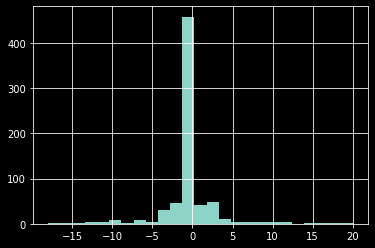

In [63]:

predictedY = model.predict(testX)
errors = predictedY - testY
errors.hist(bins = 25)

In [64]:
treeData = tree.export_graphviz(model)
graph = graphviz.Source(treeData)
graph.render("indTree1")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'indTree1'], make sure the Graphviz executables are on your systems' PATH